In [8]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.signal import convolve2d 



In [13]:
fname='edgeon_Ryan_z0_Emission_OVI_1032_270kpc.fits'
tt=fits.open(fname)
oim=np.transpose(tt['PRIMARY'].data, axes=(1,0))

rtoa = 180*3600/np.pi

cim=oim.copy()/rtoa**2

In [19]:
np.shape(oim)

(111, 222)

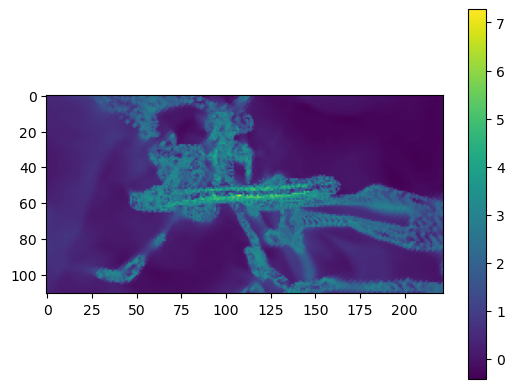

In [18]:
plt.imshow(np.log10(oim))
plt.colorbar()